<a href="https://colab.research.google.com/github/trongr/ai/blob/master/fastai/03-sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 9.8MB/s 
     |████████████████████████████████| 1.1MB 46.5MB/s 
     |████████████████████████████████| 194kB 31.5MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 92kB 13.5MB/s 
     |████████████████████████████████| 40kB 6.6MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 2.6MB 51.4MB/s 
Mounted at /content/gdrive


In [ ]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
#hide
Path.BASE_PATH = path

In [ ]:
path.ls()

(#3) [Path('train'),Path('valid'),Path('labels.csv')]

In [ ]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [ ]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [ ]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [ ]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [ ]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [ ]:
#hide_output
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [ ]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

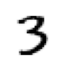

In [ ]:
show_image(three_tensors[1]);

In [ ]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [ ]:
len(stacked_threes.shape)

3

In [ ]:
stacked_threes.ndim

3

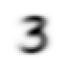

In [ ]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

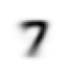

In [ ]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

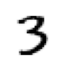

In [ ]:
a_3 = stacked_threes[1]
show_image(a_3);

In [ ]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [ ]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [ ]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [ ]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

In [ ]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
tns[:,1]

tensor([2, 5])

In [ ]:
tns[1]

tensor([4, 5, 6])

In [ ]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [ ]:
tns.type()

'torch.LongTensor'

In [ ]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [ ]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/"valid"/"3").ls()])
valid_3_tens = valid_3_tens.float() / 255

valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/"valid"/"7").ls()])
valid_7_tens = valid_7_tens.float() / 255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [ ]:
Image.open((path/"valid"/"7").ls()[0])

In [ ]:
def mnist_distance(a, b): 
  # What's the diff between mean() and mean((-1, -2))
  return (a - b).abs().mean((-1, -2))

mnist_distance(a_3, mean3)

tensor(0.1114)

In [ ]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1242, 0.1358, 0.1242,  ..., 0.1465, 0.1541, 0.1321]),
 torch.Size([1010]))

In [ ]:
def is_3(x): 
  return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [ ]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [ ]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [ ]:
is_3(valid_7_tens)

tensor([False, False, False,  ..., False, False, False])

In [ ]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s) / 2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

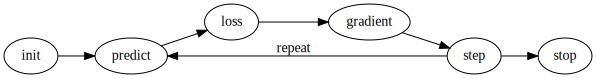

In [ ]:
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

In [ ]:
def f(x): return x**2

/usr/local/lib/python3.6/dist-packages/fastbook/__init__.py:55: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


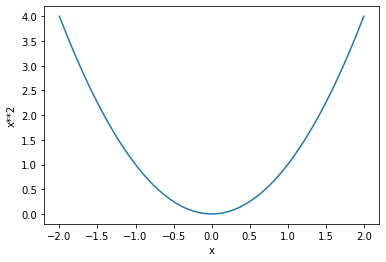

In [ ]:
plot_function(f, 'x', 'x**2')

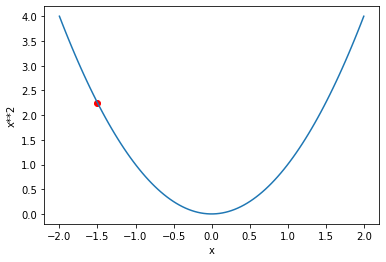

In [ ]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

In [ ]:
xt = tensor(3.).requires_grad_()

In [ ]:
yt = f(xt)
yt  

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
yt.backward()

In [ ]:
xt.grad

tensor(6.)

In [ ]:
xt =  tensor([3., 4., 10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [ ]:
def f(x): 
  return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [ ]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [ ]:
time = torch.arange(0, 20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

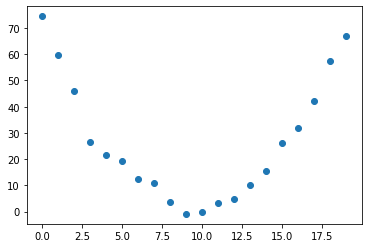

In [ ]:
speed = torch.randn(20) * 3 + 0.75 * (time - 9.5)**2 + 1
plt.scatter(time, speed)

In [ ]:
def f(t, params):
  a, b, c = params
  return a*(t**2) + b*t + c

In [ ]:
def mse(preds, targets):
  return ((preds - targets)**2).mean()

def show_preds(preds, ax=None):
  if ax is None:
    ax = plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color="red")
  ax.set_ylim(-300, 100)

In [ ]:
params = torch.randn(3).requires_grad_()
# orig_params = params.clone()

def step(params, prn=True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  lr = 1e-5
  params.data -= lr * params.grad.data
  params.grad = None
  if prn: print(loss.item())
  return preds

In [ ]:
#hide
# params = orig_params.detach().requires_grad_()

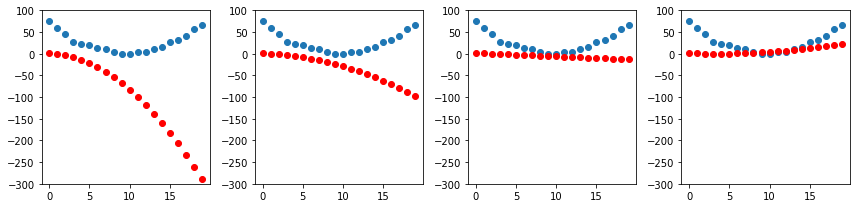

In [ ]:
_, axs = plt.subplots(1, 4, figsize=(12, 3))
for ax in axs: show_preds(step(params, False), ax)
plt.tight_layout()


In [ ]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28 * 28)

In [ ]:
train_y = tensor([1] * len(threes) + [0] * len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [ ]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [ ]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28 * 28)
valid_y = tensor([1] * len(valid_3_tens) + [0] * len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [ ]:
def init_params(size, std=1.0): 
  return (torch.randn(size) * std).requires_grad_()

In [ ]:
weights = init_params(28 * 28, 1)
bias = init_params(1)

In [ ]:
(train_x[0] * weights.T).sum() + bias

tensor([-13.2578], grad_fn=<AddBackward0>)

In [ ]:
def linear1(xb):
  return xb @ weights + bias

preds = linear1(train_x)
print(preds.shape)
print(train_y.shape)

torch.Size([12396])
torch.Size([12396, 1])


In [ ]:
corrects = (preds > 0).float() == train_y
corrects

tensor([[False, False, False,  ..., False,  True,  True],
        [False, False, False,  ..., False,  True,  True],
        [False, False, False,  ..., False,  True,  True],
        ...,
        [ True,  True,  True,  ...,  True, False, False],
        [ True,  True,  True,  ...,  True, False, False],
        [ True,  True,  True,  ...,  True, False, False]])

In [ ]:
corrects.float().mean().item()

0.503187358379364

In [ ]:
weights[0] *= 1.0001

In [ ]:
preds = linear1(train_x)
((preds > 0).float() == train_y).float().mean().item()

0.503187358379364

In [ ]:
def mnist_loss(predictions, targets):
  return torch.where(targets == 1, 1 - predictions, predictions).mean()

In [ ]:
targets = tensor([1, 0, 1])
preds = tensor([0.9, 0.4, 0.2])
torch.where(targets == 1, 1 - preds, preds)

tensor([0.1000, 0.4000, 0.8000])

In [ ]:
mnist_loss(preds, targets)

tensor(0.4333)

In [ ]:
mnist_loss(tensor([0.9, 0.4, 0.8]), targets)

tensor(0.2333)

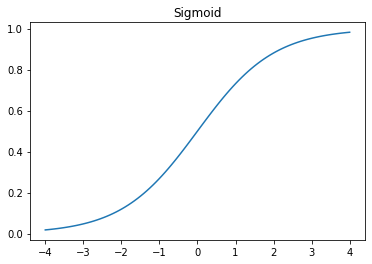

In [ ]:
def sigmoid(x): 
  return 1 / (1 + torch.exp(-x))

plot_function(torch.sigmoid, title="Sigmoid", min=-4, max=4)

In [ ]:
def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets == 1, 1 - predictions, predictions).mean()

In [ ]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [ ]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [ ]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

In [ ]:
weights = init_params(28 * 28, 1)
bias = init_params(1)

(torch.Size([256, 784]), torch.Size([256, 1]))

In [ ]:
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

valid_dl = DataLoader(valid_dset, batch_size=256)

batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [ ]:
preds = linear1(batch)
preds

tensor([ 8.0645, -2.3958, -1.7360,  6.1048], grad_fn=<AddBackward0>)

In [ ]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.4423, grad_fn=<MeanBackward0>)

In [ ]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784]), tensor(-0.0074), tensor([-0.0516]))

In [ ]:
def calc_grad(xb, yb, model):
  preds = model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()

In [ ]:
weights.grad.zero_()
bias.grad.zero_()
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0074), tensor([-0.0516]))

In [ ]:
def train_epoch(model, lr, params):
  for xb, yb in dl:
    calc_grad(xb, yb, model)
    for p in params:
      p.data -= p.grad * lr
      p.grad.zero_()

In [ ]:
(preds > 0).float() == train_y[:4]

tensor([[ True, False, False,  True],
        [ True, False, False,  True],
        [ True, False, False,  True],
        [ True, False, False,  True]])

In [ ]:
def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct = (preds > 0.5) == yb
  return correct.float().mean()

In [ ]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.5000)

In [ ]:
def validate_epoch(model): 
  accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
  return round(torch.stack(accs).mean().item(), 4)

In [ ]:
validate_epoch(linear1)

0.6063

In [ ]:
lr = 1
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6828

In [ ]:
for i in range(20):
  train_epoch(linear1, lr, params)
  print(validate_epoch(linear1), end=" ")

0.9624 0.9624 0.9624 0.9629 0.9629 0.9629 0.9629 0.9629 0.9629 0.9629 0.9634 0.9633 0.9633 0.9628 0.9633 0.9633 0.9638 0.9643 0.9648 0.9648 

In [ ]:
linear_model = nn.Linear(28 * 28, 1)

In [ ]:
w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [ ]:
class BasicOptim:
  def __init__(self, params, lr): 
    self.params, self.lr = list(params), lr

  def step(self, *args, **kwargs):
    for p in self.params:
      p.data -= p.grad.data * self.lr

  def zero_grad(self, *args, **kwargs):
    for p in self.params:
      p.grad = None

In [ ]:
opt = BasicOptim(linear_model.parameters(), lr)

In [ ]:
def train_epoch(model):
  for xb, yb in dl:
    calc_grad(xb, yb, model)
    opt.step()
    opt.zero_grad()

In [ ]:
validate_epoch(linear_model)

0.5182

In [ ]:
def train_model(model, epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end=" ")

In [ ]:
train_model(linear_model, 20)

0.4932 0.8739 0.8266 0.9101 0.9326 0.9482 0.955 0.9623 0.9657 0.9682 0.9692 0.9716 0.9736 0.9745 0.9755 0.9765 0.9775 0.978 0.9785 0.9789 

In [ ]:
linear_model = nn.Linear(28 * 28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.7871 0.8564 0.9165 0.9365 0.9487 0.957 0.9628 0.9657 0.9682 0.9706 0.9726 0.9745 0.975 0.976 0.9765 0.9775 0.978 0.9785 0.9789 

In [ ]:
dls = DataLoaders(dl, valid_dl)

In [ ]:
learn = Learner(dls, nn.Linear(28 * 28, 1), 
                opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636694,0.503486,0.495584,00:00
1,0.527644,0.209933,0.815505,00:00
2,0.194079,0.171886,0.844946,00:00
3,0.084843,0.103488,0.914132,00:00
4,0.044624,0.076283,0.934249,00:00
5,0.028959,0.061463,0.947498,00:00
6,0.022553,0.052179,0.955839,00:00
7,0.019717,0.045970,0.962218,00:00
8,0.018282,0.041587,0.965653,00:00
9,0.017419,0.038344,0.968106,00:00


In [ ]:
def simple_net(xb): 
  res = xb @ wb1 + b1
  res = res.max(tensor(0.0))
  res = res @ w2 + b2
  return res

In [ ]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

In [ ]:
simple_net = nn.Sequential(nn.Linear(28 * 28, 30),
                           nn.ReLU(),
                           nn.Linear(30, 1))

In [ ]:
learn = Learner(dls, simple_net, opt_func=SGD, 
                loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.342257,0.391081,0.514720,00:00
1,0.158037,0.242583,0.788027,00:00
2,0.086212,0.119573,0.912169,00:00
3,0.055574,0.079435,0.940628,00:00
4,0.041470,0.061619,0.955348,00:00
5,0.034363,0.051704,0.963199,00:00
6,0.030353,0.045469,0.965162,00:00
7,0.027797,0.041213,0.968597,00:00
8,0.025984,0.038123,0.970559,00:00
9,0.024598,0.035769,0.971541,00:00


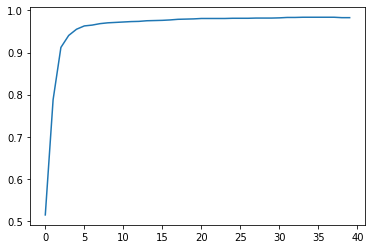

In [ ]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [ ]:
learn.recorder.values[-1][2]

0.982826292514801

In [ ]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy,
                    metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.136263,0.028441,0.993131,00:18
